# Unified Plotting for NuMu Selection

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
pi0scaling = {"val": 0, "suffix": "", "title": "No pi0 Scaling"} #no scaling

GENIEtune = "updated GENIE tune"

In [3]:
from matplotlib import pyplot as plt

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
plt.rcParams.update(params)

from load_data_run123 import *
from unblinding_far_sideband import *

In [4]:
import sys
import localSettings as ls
print(ls.main_path)
main_path = ls.main_path
sys.path.append(main_path)

/Users/davidc-local/data/searchingfornues/v08_00_00_48/


In [5]:
import scipy.stats

In [6]:
which_sideband = ['numu',"numu"]

In [7]:
samples = load_data_run123(which_sideband=which_sideband[0],
                           return_plotter=False,
                           pi0scaling=pi0scaling["val"],
                           loadpi0variables=False,
                           loadtruthfilters=False,
                           loadshowervariables=False,
                           loadnumuntuples=True,
                           loadnumuvariables=True,
                           loadnumucrtonly=True, # use CRT
                           loadfakedata=0,
                           USEBDT=False,
                           loadsystematics=True,
                           loadrecoveryvars=False)

Loading uproot files
Loading Run3 dataframes
r3data has shape :  (3410, 43)


/Users/davidc-local/miniconda3/envs/pelee/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


Loading Run1 dataframes
r1data has shape :  (4601, 43)


/Users/davidc-local/miniconda3/envs/pelee/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


Loading Run2 dataframes


/Users/davidc-local/miniconda3/envs/pelee/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


Concatenate dataframes
Add derived variables
Add BDT scores


/Users/davidc-local/miniconda3/envs/pelee/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/davidc-local/miniconda3/envs/pelee/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/Users/davidc-local/miniconda3/envs/pelee/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set o

In [8]:
import plotter
import unblinding_far_sideband
import importlib
import load_data_run123
importlib.reload(plotter)
importlib.reload(unblinding_far_sideband)
importlib.reload(load_data_run123)

<module 'load_data_run123' from '/Users/davidc-local/Neutrinos/NUE/PELEE/load_data_run123.py'>

In [9]:
plotter_runbyrun = {}
for run in [1, 2, 3, 123, 12, 30]:
    this_weights, this_pot = get_weights(run,dataset=which_sideband[1])
    if (run == 30):
        print (this_weights)
    plotter_runbyrun[run] = plotter.Plotter(samples, this_weights, pot=this_pot)

{'mc': 0.15895522388059702, 'nue': 0.002748387096774194, 'lee': 0.002748387096774194, 'ncpi0': 0.09220779220779221, 'ccpi0': 0.03312597200622084, 'dirt': 0.649390243902439, 'ncnopi': 0.029831932773109245, 'nccpi': 0.011703296703296704, 'ccnopi': 0.03865698729582577, 'cccpi': 0.04111969111969112, 'ext': 0.2571990417088349}


In [10]:
DETSYS = {'mc':True,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,\
          'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False}

# Single Variable Plotter

/Users/davidc-local/data/searchingfornues/v08_00_00_48//detsys/None_NUMU_NUMUCRT/
mc : frac. detsys matrix is : 
 [0.119 0.139 0.106 0.063 0.05  0.071 0.052 0.099 0.055 0.115 0.087 0.183
 0.132 0.108]


/Users/davidc-local/miniconda3/envs/pelee/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


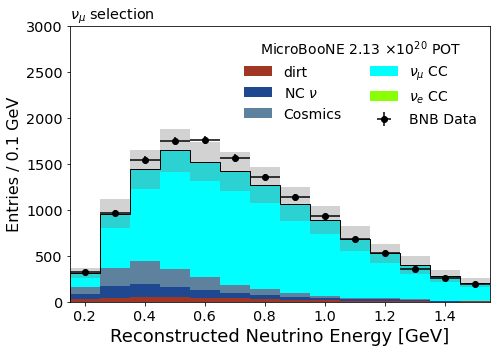

In [16]:
from unblinding_far_sideband import *

sdb_key = 'None' #'None' #'HiEZP' #'None' #'None'
pre_key = 'NUMU' #'HiEZP' #'NP'
sel_key = 'NUMUCRT' #'NPBDT'

run = 30

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format('None', preselection['dir'], sel['dir'])
print (DETSYSPATH)
QUERY = ""
ctr = 0
for query in [sideband['query'],preselection['query'],sel['query']]:
    ctr += 1
    if query is None: continue
    if QUERY: 
        if (ctr == 2):
            QUERY += ' and '
        if (ctr == 3):
            QUERY += ' and '# ~('
    QUERY += query
    #if (ctr == 3): QUERY += ')'
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'

TITLE = ""
for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"] + ' and ' + GENIEtune]:
    if text is None: continue
    TITLE += text
TITLE = r'$\nu_{\mu}$ selection'

#VARIABLE, BINS, RANGE, XTIT = 'muon_energy',14,(0.15,1.55),"muon candidate reconstructed energy [GeV]"
#VARIABLE, BINS, RANGE, XTIT = 'muon_theta',20,(-1,1),r"muon $\cos\theta$"
#VARIABLE, BINS, RANGE, XTIT = 'proton_range_energy',30,(0,0.3),"proton kinetic energy [GeV]" # proton_KE
VARIABLE, BINS, RANGE, XTIT = 'neutrino_energy',14,(0.15,1.55),"Reconstructed Neutrino Energy [GeV]"
#VARIABLE, BINS, RANGE, XTIT = 'neutrino_energy',24,(0.15,2.55),"Reconstructed Neutrino Energy [GeV]"

KIND = 'paper_category_numu'

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    figtitle="MicroBooNE",
    #labeldecimals=0,
    predictedevents=False,
    kind =KIND,
    #kind="interaction",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    #genieweight="weightSpline",
    COVMATRIX="",
    ratio=False,
    fullcov=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
    #asymErrs=True
)[0:3]


ax1.set_title(TITLE, loc='left')

#ax1.set_yscale('log')
#ax1.set_ylim(0, ax1.get_ylim()[1]*1.35)
ax1.set_ylim(0,3000)
#ax2.set_ylim(0.5,1.5)

plt.tight_layout()
fig.show()
SELNAME = '_{}_{}_{}_'.format(sideband['dir'], preselection['dir'], sel['dir'])
save_path = '/Users/davidc-local/Neutrinos/NUE/PRD/' + SELNAME + VARIABLE
fig.savefig(save_path + '.pdf', dpi=250)    

In [ ]:
print ((samples['ext'].query(QUERY)).shape)

In [ ]:
# store text files with selected events (needed input to produce SBNFit NTuples)

# thruth-cut on MC sample to avoid double counting with truth-filters (i.e. ccpi0, ncpi0, cccpi, ...)
NU_Q = "~(abs(nu_pdg) == 12 & ccnc == 0)"
NU_Q += " & ~(mcf_np0==1 & mcf_nmp==0 & mcf_nmm==0 & mcf_nem==0 & mcf_nep==0)"
NU_Q += " & ~(mcf_pass_ccpi0==1)"
NU_Q += " & ~(mcf_pass_ccnopi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_ncnopi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_cccpi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_nccpi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"

SELPATH = '_{}_{}_{}_'.format(sideband['dir'], preselection['dir'], sel['dir'])

print (ls.ntuple_path)

for key, df in samples.items():
    #print ('sample : ',key)
    #continue
    fout = open(ls.ntuple_path+'SBNFit/'+SELPATH+key+'_bugfix.txt','w')
    print (ls.ntuple_path+'SBNFit/'+SELPATH+key+'_bugfix.txt')
    dfsel = df.query(QUERY)
    if (key == 'mc'):
        dfsel = dfsel.query(NU_Q)
    #if (key != 'data'):
    #    continue
    #    print ('weight for sample %s is %.05f'%(key,this_weights[key]))
    print ('sample %s has %i selected entries'%(key,dfsel.shape[0]))
    for i,row in dfsel.iterrows():
        run = row['run']
        sub = row['sub']
        evt = row['evt']
        etrue = row['nu_e']
        
        # numus
        '''
        nuenergy       = row['neutrino_energy']
        muenergy       = row['muon_energy']
        protonenergy   = row['proton_KE']
        thetasum       = row['theta1PlusTheta2']
        phidiff        = row['phi1MinusPhi2']
        pt             = row['pt']
        muonangle      = row['muon_theta_rad']
        protonangle    = row['proton_theta_rad']
        cosmuonangle   = row['muon_theta']
        cosprotonangle = row['proton_theta']
        ntracks        = row['n_tracks_tot']
        nprotons       = row['n_protons_tot']

        if (np.isnan(nuenergy) or np.isinf(nuenergy) or (nuenergy <= 0)):
            continue
        fout.write('%i %i %i %.04f %.04f %.04f %.02f %.04f %.04f %.04f %.04f %.04f %.04f %.04f %.04f %.04f \n'%\
                   (run,sub,evt,nuenergy,muenergy,muonangle,etrue,protonenergy,\
                    protonangle,cosmuonangle,cosprotonangle,thetasum,phidiff,pt,ntracks,nprotons))
        '''
        
        # nues
        #'''
        nuenergy       = row['reco_e']
        elecenergy     = row['shr_energy_tot_cali'] / 0.83  
        protonenergy   = row['protonenergy'] 
        thetasum       = row['theta1PlusTheta2']
        phidiff        = row['phi1MinusPhi2']
        pt             = row['pt']
        elecangle      = row['shr_theta']
        protonangle    = row['trk_theta']
        coselecangle   = row['cos_shr_theta']
        cosprotonangle = row['cos_trk_theta']
        ntracks        = row['n_tracks_tot']
        fout.write('%i %i %i %.04f %.04f %.04f %.02f %.04f %.04f %.04f %.04f %.04f %.04f %.04f %.04f \n'%\
                   (run,sub,evt,nuenergy,elecenergy,elecangle,etrue,protonenergy,\
                    protonangle,coselecangle,cosprotonangle,thetasum,phidiff,pt,ntracks))
        #'''
    fout.close()

In [ ]:
samples['data'].query(QUERY + ' and run < 6000 and proton_range_energy > 0.05 and proton_range_energy < 0.15 and reco_nu_vtx_sce_x > 50 and reco_nu_vtx_sce_x < 200')[["run","sub","evt","neutrino_energy","reco_nu_vtx_sce_x","reco_nu_vtx_sce_z"]]

In [ ]:
NU_Q = "~(abs(nu_pdg) == 12 & ccnc == 0)"
NU_Q += " & ~(mcf_np0==1 & mcf_nmp==0 & mcf_nmm==0 & mcf_nem==0 & mcf_nep==0)"
NU_Q += " & ~(mcf_pass_ccpi0==1)"
NU_Q += " & ~(mcf_pass_ccnopi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_ncnopi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_cccpi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_nccpi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"


print (len(samples['mc'].query(QUERY + ' and reco_e < 0.25 and reco_e > 0.15')))

In [ ]:
samples['mc'].query(QUERY + ' and nu_pdg != 12 and nu_pdg != -12 and reco_e < 0.25 and reco_e > 0.15')[["run2","run","sub","evt","nu_e","reco_e","weightSplineTimesTune","reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z"]]

In [ ]:
#VARIABLE, BINS, RANGE, XTIT = 'reco_e',21,(0.05, 2.15),r"reco energy"
#VARIABLE, BINS, RANGE, XTIT = 'reco_e',7,(0.05, 2.85),r"Reconstructed Energy [GeV]"
#VARIABLE, BINS, RANGE, XTIT = 'pi0_score',6,(0,1),r"pi0 score"
#VARIABLE, BINS, RANGE, XTIT = 'nu_e',20,(0,2),r"true neutrino energy [GeV]"
#VARIABLE, BINS, RANGE, XTIT = 'pi0_e',10,(0,1),r"pi0 energy"
#VARIABLE, BINS, RANGE, XTIT = 'pi0_score',5,(0.5,1),r"BDT $\pi^0$ score"
#VARIABLE, BINS, RANGE, XTIT = 'bkg_score',10,(0,1),r"bkg score"
#VARIABLE, BINS, RANGE, XTIT = 'nonpi0_score',6,(0,1),r"non-pi0 score"
#VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',10,(-0.5, 9.5),"n showers contained"
#VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',1,(0.5, 1.5),"n showers contained"
#VARIABLE, BINS, RANGE, XTIT = 'n_tracks_contained',10,(-0.5, 9.5),"n tracks contained"
#VARIABLE, BINS, RANGE, XTIT = 'shr_tkfit_dedx_max',10,(-0.5, 9.5),"shr tkfit dE/dx (max, 0-4 cm) [MeV/cm]"
#VARIABLE, BINS, RANGE, XTIT = 'shr_tkfit_dedx_max',15,(0, 10),"shr tkfit dE/dx (max, 0-4 cm) [MeV/cm]"
#VARIABLE, BINS, RANGE, XTIT = 'tksh_distance',20,(0, 40),"trk-shr distance [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'trkshrhitdist2',20,(0, 20),"trk-shr hit dist Y"
#VARIABLE, BINS, RANGE, XTIT = 'trkpid',15,(-1, 1),"trk PID"
#VARIABLE, BINS, RANGE, XTIT = 'secondshower_Y_nhit',20,(0, 100),"secondshower Y nhit"
#VARIABLE, BINS, RANGE, XTIT = 'tksh_angle',10,(-1, 1),"trk-shr angle"
#VARIABLE, BINS, RANGE, XTIT = 'ismerged',2,(-0.5, 1.5),"is merged"
#VARIABLE, BINS, RANGE, XTIT = 'merge_bestdot',20,(-1, 1),"merge bestdot"
#VARIABLE, BINS, RANGE, XTIT = 'merge_bestdist',20,(0, 40),"merge bestdist"
#VARIABLE, BINS, RANGE, XTIT = 'reco_e',6,(0.85,2.65),r"Reconstructed Energy [GeV]"



#VARIABLE, BINS, RANGE, XTIT = 'trkpid',21,(-1,1),"track LLR PID"
#VARIABLE, BINS, RANGE, XTIT = 'hits_ratio',20,(0,1),"shower hits/all hits"
#VARIABLE, BINS, RANGE, XTIT = 'shrmoliereavg',20,(0,50),"average Moliere angle [degrees]"
#VARIABLE, BINS, RANGE, XTIT = 'subcluster',20,(0,40),"N sub-clusters in shower"
#VARIABLE, BINS, RANGE, XTIT = 'subcluster',20,(0,20),"N sub-clusters in shower"
#VARIABLE, BINS, RANGE, XTIT = 'subcluster2',10,(0.5,20.5),"N sub-clusters in sub-leading shower"
#VARIABLE, BINS, RANGE, XTIT = 'subcluster2',10,(0.,20.),"N sub-clusters in sub-leading shower"
#VARIABLE, BINS, RANGE, XTIT = 'shr2pid',15,(-1, 1),"shr2 PID"
#VARIABLE, BINS, RANGE, XTIT = 'tk1sh2_distance',20,(0, 100),"trk1-shr2 distance [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'shr2_score',10,(0,0.5),r"shr2 score"
#VARIABLE, BINS, RANGE, XTIT = 'shr2_id',10,(-0.5,9.5),r"shr2 id"
#VARIABLE, BINS, RANGE, XTIT = 'shrsubclustersold',20,(0,40),"N sub-clusters in shower"
#VARIABLE, BINS, RANGE, XTIT = 'deltashrsbcfix',21,(-10.5,10.5),"subcluster-shrsubclustersfix"
#VARIABLE, BINS, RANGE, XTIT = 'deltashr2sbcfix',21,(-10.5,10.5),"subcluster-shr2subclustersfix"
#VARIABLE, BINS, RANGE, XTIT = 'trkfit',10,(0,1.0),"Fraction of Track-fitted points"
#VARIABLE, BINS, RANGE, XTIT = 'CosmicIPAll3D',20,(0,200),"CosmicIPAll3D [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'tksh_distance',12,(0,6),"trk-shr distance [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'shr_tkfit_dedx_max',15,(0,10),"shr tkfit dE/dx (max, 0-4 cm) [MeV/cm]"
#VARIABLE, BINS, RANGE, XTIT = 'tksh_angle',20,(-1,1),"cos(trk-shr angle)"
#VARIABLE, BINS, RANGE, XTIT = 'shr_trk_len',20,(0,400),"shr trk len [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'shr2_nhits',20,(0,1000),"shr2 nhits"
#VARIABLE, BINS, RANGE, XTIT = 'shr2_energy',20,(0,250),"shr2 energy"

#VARIABLE, BINS, RANGE, XTIT = 'trk_len',20,(0,200),"trk len [cm]"

#VARIABLE, BINS, RANGE, XTIT = 'shr12_cos_p1_dstart',20,(-1,1),"cos(shr1_dir,shr2_start-shr1_start)"
#VARIABLE, BINS, RANGE, XTIT = 'shr12_cos_p1_dstart',20,(0.8,1),"cos(shr1_dir,shr2_start-shr1_start)"

#VARIABLE, BINS, RANGE, XTIT = 'is_shr2splt',2,(-0.5,1.5),"is shr2splt"
#VARIABLE, BINS, RANGE, XTIT = 'is_trk1bad',2,(-0.5,1.5),"is trk1bad"
#VARIABLE, BINS, RANGE, XTIT = 'is_trk2srtshr',2,(-0.5,1.5),"is trk2srtshr"
#VARIABLE, BINS, RANGE, XTIT = 'is_shr2prtn',2,(-0.5,1.5),"is shr2prtn"
#VARIABLE, BINS, RANGE, XTIT = 'is_trk1embd',2,(-0.5,1.5),"is trk1embd"
#VARIABLE, BINS, RANGE, XTIT = 'trk_distance',10,(0, 300),"trk-vtx distance"
#VARIABLE, BINS, RANGE, XTIT = 'trk_len',20,(0, 400),"trk len"

#VARIABLE, BINS, RANGE, XTIT = 'sh1sh2_distance',20,(0,200),"sh1sh2 distance [cm]"

#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_x',12,(0,252),"vtx x [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_y',12,(-120,120),"vtx y [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'reco_nu_vtx_sce_z',12,(0,996),"vtx z [cm]"

#VARIABLE, BINS, RANGE, XTIT = 'protonenergy',12,(0,0.6),"proton kinetic energy [GeV]"
#VARIABLE, BINS, RANGE, XTIT = 'shr_theta',21,(0,3.14),r"Shower $\theta$"
#VARIABLE, BINS, RANGE, XTIT = 'trk_theta',21,(0,3.14),r"Track $\theta$"

In [ ]:
# store text files with selected events (needed input to produce SBNFit NTuples)

# thruth-cut on MC sample to avoid double counting with truth-filters (i.e. ccpi0, ncpi0, cccpi, ...)
NU_Q = "~(abs(nu_pdg) == 12 & ccnc == 0)"
NU_Q += " & ~(mcf_np0==1 & mcf_nmp==0 & mcf_nmm==0 & mcf_nem==0 & mcf_nep==0)"
NU_Q += " & ~(mcf_pass_ccpi0==1)"
NU_Q += " & ~(mcf_pass_ccnopi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_ncnopi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_cccpi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"
NU_Q += " & ~(mcf_pass_nccpi==1 & (nslice==0 | (slnunhits/slnhits)>0.1))"

SELPATH = '_{}_{}_{}_'.format(sideband['dir'], preselection['dir'], sel['dir'])

print (ls.ntuple_path)

for key, df in samples.items():
    #print ('sample : ',key)
    #continue
    fout = open(ls.ntuple_path+'SBNFit/'+SELPATH+key+'_1eNp_RUN3.txt','w')
    dfsel = df.query(QUERY)
    if (key == 'mc'):
        dfsel = dfsel.query(NU_Q)
    if (key != 'data'):
        print ('weight for sample %s is %.05f'%(key,this_weights[key]))
    print ('sample %s has %i selected entries'%(key,dfsel.shape[0]))
    for i,row in dfsel.iterrows():
        run = row['run']
        sub = row['sub']
        evt = row['evt']
        etrue = row['nu_e']
        # numus
        #nuenergy = row['neutrino_energy']
        #muenergy = row['muon_energy']
        #muonangle = row['muon_theta']
        #if (np.isnan(nuenergy) or np.isinf(nuenergy) or (nuenergy <= 0)):
        #    continue
        #fout.write('%i %i %i %.04f %.04f %.04f %.02f \n'%(run,sub,evt,nuenergy,muenergy,muonangle,etrue))
        # nues
        nuenergy       = row['reco_e']
        elecenergy     = row['shr_energy_tot_cali'] / 0.83
        elecangle      = row['shr_theta']
        protonangle    = row['trk_theta']
        coselecangle   = row['cos_shr_theta']
        cosprotonangle = row['cos_trk_theta']
        fout.write('%i %i %i %.04f %.04f %.04f %.02f \n'%(run,sub,evt,nuenergy,elecenergy,elecangle,etrue))
    fout.close()

In [ ]:
for key, df in samples.items():
    if (key != 'ext'):
        continue
    fout = open('/Users/davidc-local/Neutrinos/TRIGGER/PROTONS/'+'protons.txt','w+')
    dfsel = df.query(QUERY)
    LEGEND  = 'run subrun event vtx-x vtx-y vtx-z trk-pid trk-length trk-start-x trk-start-y trk-start-z'
    LEGEND += ' trk-end-x trk-end-y trk-end-z energy FlashPE track-phi track-theta clusterfraction \n'
    print (LEGEND)
    fout.write(LEGEND)
    print ('sample %s has %i selected entries'%(key,dfsel.shape[0]))
    for i,row in dfsel.iterrows():
        run = row['run']
        sub = row['sub']
        evt = row['evt']
        vtx_x = row['reco_nu_vtx_sce_x']
        vtx_y = row['reco_nu_vtx_sce_y']
        vtx_z = row['reco_nu_vtx_sce_z']
        trk_end_x = row['trk1_end_x']
        trk_end_y = row['trk1_end_y']
        trk_end_z = row['trk1_end_z']
        trk_beg_x = row['trk1_beg_x']
        trk_beg_y = row['trk1_beg_y']
        trk_beg_z = row['trk1_beg_z']       
        trk_len   = row['trk1_len']
        trk_energy = row['trk1_range_proton']
        trk_pid = row['trk1_pid']
        slclustfrac = row['slclustfrac']
        flashpe = row['flash_pe']
        trk_theta = row['trk1_theta']
        trk_phi = row['trk1_phi']
    
        S  = '%i %i %i '%(run,sub,evt)
        S += ' %.04f %.04f %.04f'%(vtx_x,vtx_y,vtx_z)
        S += ' %.04f'%trk_pid
        S += ' %.04f'%trk_len
        S += ' %.04f %.04f %.04f'%(trk_beg_x,trk_beg_y,trk_beg_z)
        S += ' %.04f %.04f %.04f'%(trk_end_x,trk_end_y,trk_end_z)
        S += ' %.04f'%trk_energy
        S += ' %.04f'%flashpe
        S += ' %.04f %.04f'%(trk_phi,trk_theta)
        S += ' %.04f \n'%(slclustfrac)
        fout.write(S)
    fout.close()

In [ ]:
# just a simple check to verify there are no NaN in data
samples['data'].columns[samples['data'].isna().any()].tolist()

In [ ]:
#print(samples['data'].query(QUERY)[["run","sub","evt","reco_e"]])#,"pi0_score"
#samples['data'].query(QUERY)[["run","sub","evt","reco_e","n_showers_contained","n_tracks_contained","tksh_distance","shr_tkfit_dedx_max","trkpid","hits_ratio","trkfit","tksh_angle","subcluster","shrmoliereavg","trkshrhitdist2","shr_trk_len","shr_score","pi0_score","nonpi0_score"]] 
samples['data'].query(QUERY)[["run","sub","evt","reco_e","n_showers_contained","n_tracks_contained","tksh_distance","shr_tkfit_dedx_max","trkpid","pi0_score","nonpi0_score"]] 

In [ ]:
#print(samples['data'].query(QUERY)[["run","sub","evt"]])
#QUERY=" and ".join([HIGH_ENERGY_EXT,BDTCQ])
print(QUERY)
print(len(samples['data'].query(QUERY)[["run","sub","evt","reco_e"]]))
pd.set_option('display.max_rows', 100)
print(samples['data'].query(QUERY)[["run","sub","evt","reco_e"]])from significance_calculator import significanceCalculator

this_cov = plotter_runbyrun[run].cov + plotter_runbyrun[run].cov_mc_stat
expected_bin_contents = {'bg': out[3][0][-1],
                         'signal': np.zeros(out[3][0][-1].shape)}
observed_bin_contents = plotter_runbyrun[run].data
this_pot = pot_data_unblinded[which_sideband[1]][run][0]

my_signif = significanceCalculator(expected_bin_contents, pot=this_pot)
my_signif.setCovarianceMatrix(this_cov, is_cov='cov')

fig, ax = my_signif.testStatisticsWithData(0, 1, 
                                           observed_bin_contents, 
                                           chi2_pdf_superimposed=True, 
                                           n_toy=100000, 
                                           n_bins=100, 
                                           range=[0,40],
                                           title=f'Run {run}, {XTIT}, N bins = {BINS}\n',
                                           test_stat='chi2_cnp')

# Multiple variable plotting

In [ ]:
from unblinding_far_sideband import *

dirappend = ""

#plot_variables = [('reco_e',7,(0.05,2.85),r"Reconstructed Energy [GeV]","coarse")]

#plot_variables = [
#                  ('shrmoliereavg',10,(0,10),"average Moliere angle [degrees]","zoomed"),
#                  ('subcluster',20,(0,80),"N sub-clusters in shower","extended"),
#                  ('tksh_distance',12,(0,6),"trk-shr distance [cm]","zoomed"),
#                  ('nonpi0_score',6,(0,1.0),"BDT non-$\pi^0$ score"),
#                  ('pi0_score',6,(0,1.0),"BDT $\pi^0$ score"),
#                  ('bkg_score',10,(0,1.0),"1e0p BDT score"),
#                  ('reco_e',7,(0.05,2.85),r"Reconstructed Energy [GeV]","coarse"),
#                  ('reco_e',21,(0.05,2.15),r"Reconstructed Energy [GeV]"),
#                  ('reco_e',20,(0.05,3.05),r"Reconstructed Energy [GeV]","extended"),
#]

#plot_variables  = unblinding_far_sideband.shrsel_variables
#plot_variables += unblinding_far_sideband.trksel_variables

# Np

plot_variables  = None
plot_variables  = unblinding_far_sideband.loosesel_variables_1eNp

#plot_variables  = unblinding_far_sideband.bdt_common_variables_1eNp
#plot_variables += unblinding_far_sideband.bdt_1enp_variables
#plot_variables += unblinding_far_sideband.energy_variables
#plot_variables += unblinding_far_sideband.kinematic_variables
#plot_variables += unblinding_far_sideband.basic_variables
#plot_variables += unblinding_far_sideband.bdtscore_variables

#plot_variables =[('reco_e',22,(-0.05,2.15),r"Reconstructed Energy [GeV]")]

# 0p
#plot_variables  = unblinding_far_sideband.bdt_common_variables_1e0p
#plot_variables += unblinding_far_sideband.bdt_1e0p_variables
#plot_variables += unblinding_far_sideband.basic_variables
#plot_variables += unblinding_far_sideband.energy_variables
#plot_variables += unblinding_far_sideband.kinematic_variables
#plot_variables += unblinding_far_sideband.bdtscore_variables

#plot_variables = energy_variables

#plot_variables = [('tk1sh1_angle_alltk',10,(-1,1),"cos(tk1sh1)")]

# choose sideband, preselection, and selection(s)
# find defintions in unblinding_far_sideband.py
#sdb_key = 'HiEext'
#pre_key = 'NPOneShr'
#sel_keys = ['None'] #['None','NPVL','NPL','NPBDT'] #['None','NPVL','NPL','NPBDT','NPT']

#sdb_key = 'TwoPShr'
#pre_key = 'NP'
#sel_keys = ['NPBDTAllShr'] #['None','NPVLAllShr','NPLAllShr','NPBDTAllShr','NPTAllShr'] #['None','NPVLAllShr','NPLAllShr','NPBDTAllShr','NPTAllShr']

# Zp High-Energy
#sdb_key = 'HiEZP' #'None' #'None'
#pre_key = 'ZPOneShr' #'NP'
#sel_keys = ['None'] #['ZPBDT']# ['ZPLOOSESEL'] #'NPBDT'

# Zp low-PID
sdb_key = 'MPID' #'NearEOnly' #'None' #'None'
pre_key = 'NPOneShr' #'NP'
sel_keys = ['None']#,'NPL','NPVL']#,'NPL','NPVL'] #['None'] #['ZPBDT']# ['ZPLOOSESEL'] #'NPBDT'

# Zp 2+ shower
#sdb_key = 'TwoPShr' #'HiEZP' #'None' #'None'
#pre_key = 'ZPTwoShr' #'HiEZP' #'NP'
#sel_keys = ['ZPLOOSETWOSHR'] #['ZPBDTTWOSHR'] # ['ZPLOOSETWOSHR'] #'NPBDT'

# Np low-bdt
#sdb_key = 'LPID' 
#pre_key = 'NPOneShr'
#sel_keys = ['None'] #'NPBDT'

# Np HighENergy
#sdb_key = 'HiEext'
#pre_key = 'NPOneShr'
#sel_keys = ['None'] #['None','NPVL','NPL','NPBDT'] #['None','NPVL','NPL','NPBDT','NPT']

# Np 2+ shower
#sdb_key = 'TwoPShr'
#pre_key = 'NP'
#sel_keys = ['NPBDTAllShr'] #['None','NPVLAllShr','NPLAllShr','NPBDTAllShr'] #['None','NPVL','NPL','NPBDT','NPT']

#sdb_key = 'LPID'
#pre_key = 'NP'
#sel_keys = ['None','NPVL','NPL']#
runs = [123,1, 2, 3] #[1,2,3,12,123]

DETSYS = {}

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]

for run in runs:
    for sel_key in sel_keys:
        sel =  selection_categories[sel_key]
        print('\nRun %i, %s, %s, %s'%(run, sideband['dir'], preselection['dir'], sel['dir']))
        if (which_sideband[1] != "opendata"):
            this_folder = ls.plots_path+'PELEE_far_sideband_runbyrun'+dirappend+'/'
        else:
            this_folder = ls.plots_path+'PELEE_opendata/'
        this_folder += 'run_{}/'.format(run)
        this_folder += '{}_{}_{}_LOOSEVAR'.format(sideband['dir'], preselection['dir'], sel['dir'])
        this_folder += (pi0scaling["suffix"]+'/')
        !mkdir -p $this_folder
        
        print ('folder: ',this_folder)
        
        pvaluetxtpath = this_folder + 'pvalues.txt'
        pvalsfile = open(pvaluetxtpath,'w+')

        this_query = ""
        for query in [sideband['query'],preselection['query'],sel['query']]:
            if query is None: continue
            if this_query: this_query += ' and '
            this_query += query
        if run in [1, 2, 3, 12]:
            this_query += f' and run{run}==True'

        #formatting can be improved..
        this_title = ""
        for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"] + ' and ' + GENIEtune]:
            if text is None: continue
            this_title += text

        pvalues = [[] for _ in range(len(pvaluetypes))]
        
        for plot_variable in plot_variables:
            VARIABLE, BINS, RANGE, XTIT = plot_variable[0:4]
            
            #if (VARIABLE == 'bkg_score'):
            #    break
            
            #if VARIABLE != 'tksh_angle': continue
            #if len(plot_variable)>4 or VARIABLE not in TRAINVAR: continue
            print(VARIABLE, BINS, RANGE, XTIT)
            fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
            VARIABLE,   
            query=this_query,
            kind="paper_category",
            #kind="flux",
            #kind="interaction",
            #kind="sample",
            #kind="trk1_backtracked_pdg",
            #kind="sample",
            draw_sys=True,
            detsysdict=DETSYS,
            DETSYSPATH=DETSYSPATH,
            #genieweight=""
            COVMATRIX="",#'cov_matrix_Enu_reco_1eNp.txt',
            ratio=True,
            fullcov=False,
            stacksort=3,
            title=XTIT,
            bins=BINS,
            range=RANGE,
            chisq=True,
            #asymErrs=True
            )[0:3]

            if len(plot_variable) == 6:
                if plot_variable[5] is True:
                    ax1.set_yscale('log')
            else:
                ax1.set_ylim(0, ax1.get_ylim()[1]*1.8) 

            ax1.set_title(this_title, loc='left')
            ax2.set_ylim(0,2)
            plt.tight_layout()
            save_path = this_folder+VARIABLE
            if len(plot_variable) >= 5:
                save_path += ('_' + plot_variable[4])
            fig.savefig(save_path + '.pdf', dpi=250)    
            plt.close()
            # store pvalues
            if len(plot_variable)==4 and VARIABLE in TRAINVAR:
                for idx, pvt in enumerate(pvaluetypes):
                    pvalues[idx].append(plotter_runbyrun[run].stats[pvt])
            #print ('%s %.04f'%(VARIABLE,plotter_runbyrun[run].stats['chisqstatonly']))
            PVALSTRING = '%s %.4f %.4f %.4f' % (VARIABLE, plotter_runbyrun[run].stats['pvaluestatonly'], plotter_runbyrun[run].stats['pvaluediag'], plotter_runbyrun[run].stats['pvalue'])
            print(PVALSTRING)
            pvalsfile.write(PVALSTRING + '\n')
        # make pvalue plots
        #print(pvalues)
        pvalsfile.close()
        for idx, pvt in enumerate(pvaluetypes):
            if len(pvalues[idx])!=16: continue
            plt.figure(figsize=(9, 7))
            plt.hist(pvalues[idx], bins=10, range=(0,1))
            plt.title(this_title, loc='left')
            plt.xlabel(pvt)
            plt.ylabel("number of BDT input variables")
            plt.savefig(this_folder + pvt + '.pdf', dpi=250)
            plt.close()

In [ ]:
samples['data'].query(QUERY)[["run","sub","evt","reco_e","pi0_score","nonpi0_score","n_showers_contained","n_tracks_contained","reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z"]]

In [ ]:
from math import sqrt

In [ ]:
def GetQuadrature(str):
    words = str.split('&')
    err = 0.
    for word in words:
        e = float(word)
        err += e*e
    return sqrt(err)
    #print (float(word))

In [ ]:
print (GetQuadrature('0.046 & 0.017 & 0.080 & 0.011 & 0.013 & 0.121 & 0.007 & 0.000 & 0.048'))